## **Prévision des crédits de logement**

In [ ]:
# Importation des packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import pickle

In [ ]:
# Importation des données 

df_credit = pd.read_csv('train.csv')
df_credit.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


**Large vue sur les données :**

In [ ]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df_credit.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
# Taille du Dataset
df_credit.shape

(614, 13)

In [ ]:
# Faire une copie de la base de données original à fin de faire des transformation dessus
df = df_credit

In [ ]:
# Vérification de nombre de valeurs manquantes
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Pour supprimer les valeurs manquantes:
- Variables catégorique : on va les remplacer par le mode
- Variable numériques: on va les remplacer par la moyenne / médiane 
   

In [ ]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
# Diviser et afficher les données en variables catégoriques et variables numériques
var_cat = ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education','Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']
var_num = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term']

print('Les variable catégoriques :', var_cat)
print('Les variable numériques :', var_num)


Les variable catégoriques : ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']
Les variable numériques : ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']


Suppréssion des valeurs manquantes

In [ ]:
# Supprimer les valeurs catégoriques manquantes et les remplacer par le mode  

df['Gender'].fillna(df['Gender'].mode()[0],inplace=True) 
df['Married'].fillna(df['Married'].mode()[0],inplace=True) 
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True) 
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True) 
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True) 


In [ ]:
# Supprimer les valeurs numériques manquantes et les remplacer par la médiane  

df['LoanAmount'].fillna(df['LoanAmount'].median(),inplace=True) 
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(),inplace=True) 

In [ ]:
# Vérification s'il ne y'a pas de valeurs manquantes
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Analyse univariée : étudier une seule variable ' **Target** '  qui permet de définir est ce que le crédit sera autorisé pour le client ou non .

In [ ]:
# Vérification de combien de crédits accordés et non accordés
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [ ]:
# Vérification de crédits accordés et non accordés en %
df['Loan_Status'].value_counts(normalize=True) * 100

Y    68.729642
N    31.270358
Name: Loan_Status, dtype: float64

<Axes: title={'center': 'Crédit accordé ou pas'}>

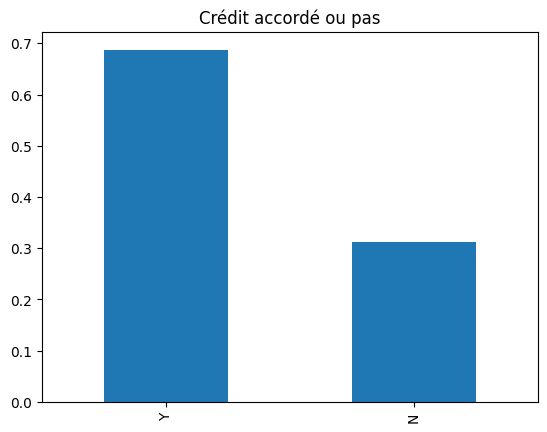

In [ ]:
# Visualisations de crédits accordés et non accordés 

df['Loan_Status'].value_counts(normalize=True).plot.bar(title='Crédit accordé ou pas')

Les variables catégoriques

In [ ]:
df['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

In [ ]:
df['Gender'].value_counts(normalize=True) * 100

Male      81.758958
Female    18.241042
Name: Gender, dtype: float64

<Axes: title={'center': 'Comparaison des sexes qui demandent un crédit'}>

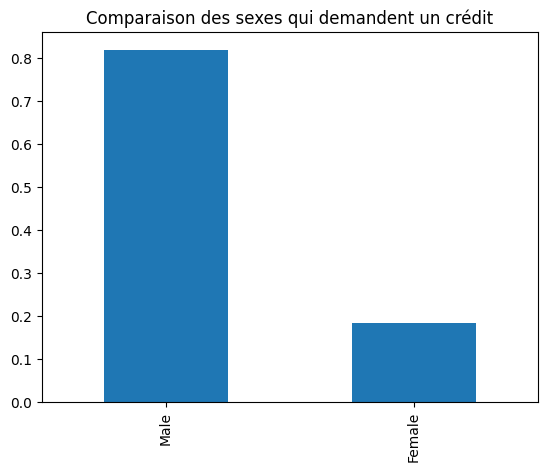

In [ ]:
df['Gender'].value_counts(normalize=True).plot.bar(title='Comparaison des sexes qui demandent un crédit')

Faire la même chose pour les autres **variables**

In [ ]:
df['Married'].value_counts(normalize=True) * 100

Yes    65.309446
No     34.690554
Name: Married, dtype: float64

Les variables numériques

In [ ]:
# Description des valeurs numériques
df[var_num].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423
std,6109.041673,2926.248369,84.107233,64.428629
min,150.000000,0.000000,9.000000,12.000000
25%,2877.500000,0.000000,100.250000,360.000000
50%,3812.500000,1188.500000,128.000000,360.000000
75%,5795.000000,2297.250000,164.750000,360.000000
max,81000.000000,41667.000000,700.000000,480.000000


<ipython-input-24-37fd7e752b9a>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ApplicantIncome'])


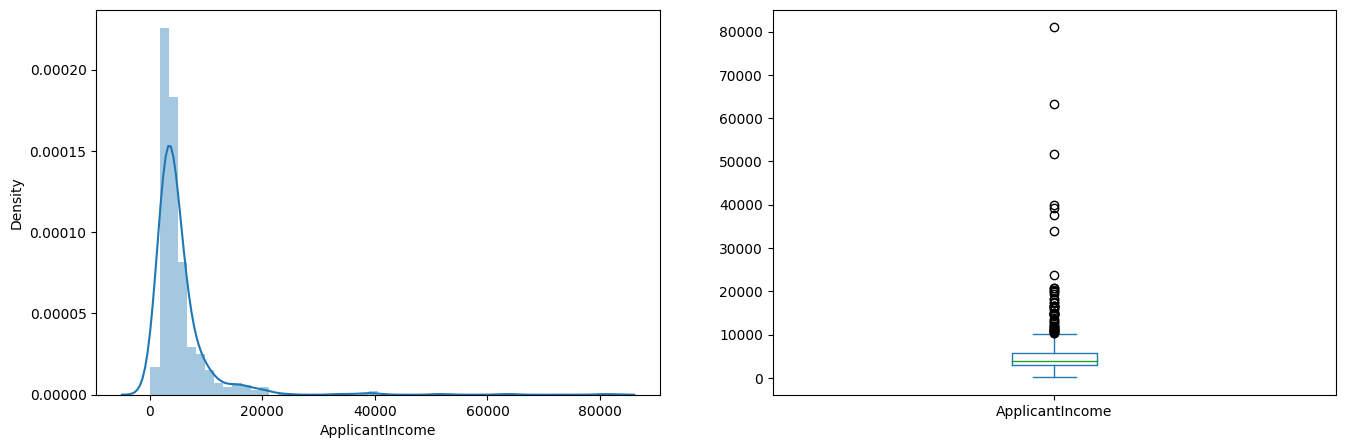

In [ ]:
# Visualisation des valeurs numériques

plt.figure(1)

plt.subplot(121)
sns.distplot(df['ApplicantIncome'])

plt.subplot(122)
df['ApplicantIncome'].plot.box(figsize=(16,5))

plt.show()

<ipython-input-25-98f9edf625f8>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CoapplicantIncome'])


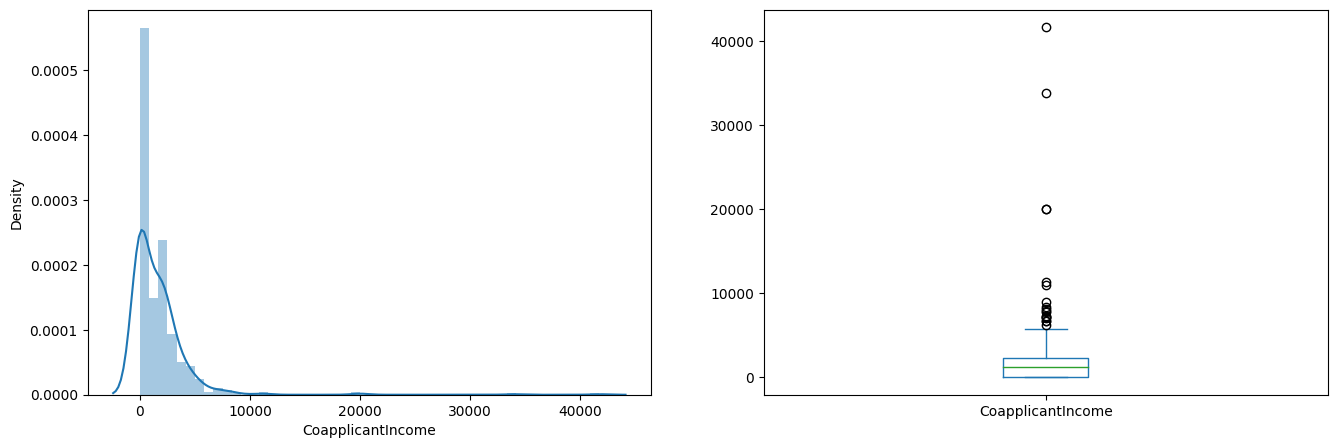

In [ ]:
plt.figure(1)

plt.subplot(121)
sns.distplot(df['CoapplicantIncome'])

plt.subplot(122)
df['CoapplicantIncome'].plot.box(figsize=(16,5))

plt.show()

<ipython-input-26-fb511b64c9bf>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['LoanAmount'])


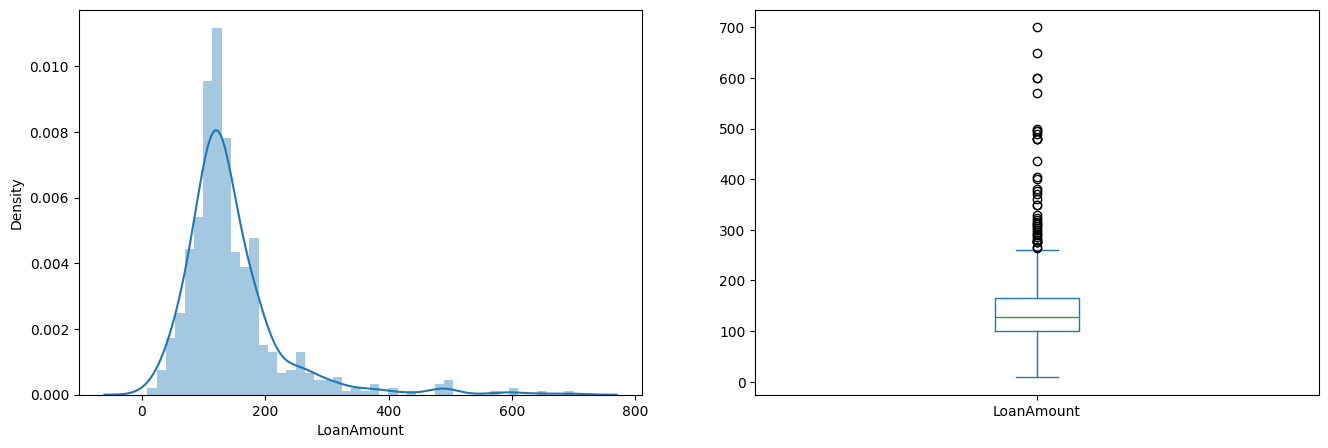

In [ ]:
plt.figure(1)

plt.subplot(121)
sns.distplot(df['LoanAmount'])

plt.subplot(122)
df['LoanAmount'].plot.box(figsize=(16,5))

plt.show()

<ipython-input-27-85841725a0ff>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Loan_Amount_Term'])


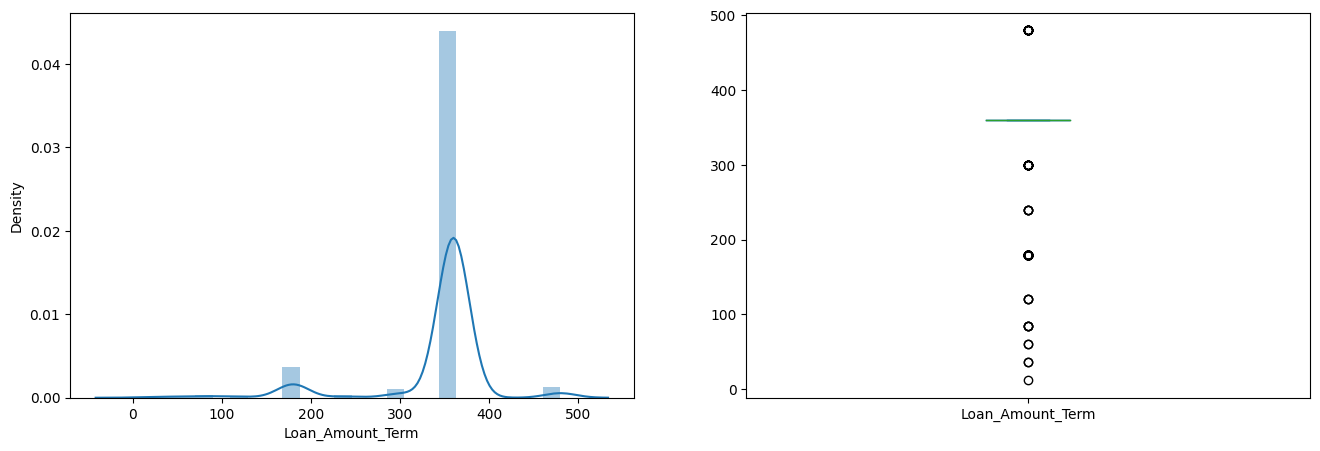

In [ ]:
plt.figure(1)

plt.subplot(121)
sns.distplot(df['Loan_Amount_Term'])

plt.subplot(122)
df['Loan_Amount_Term'].plot.box(figsize=(16,5))

plt.show()

**Analyse Bivariée :**

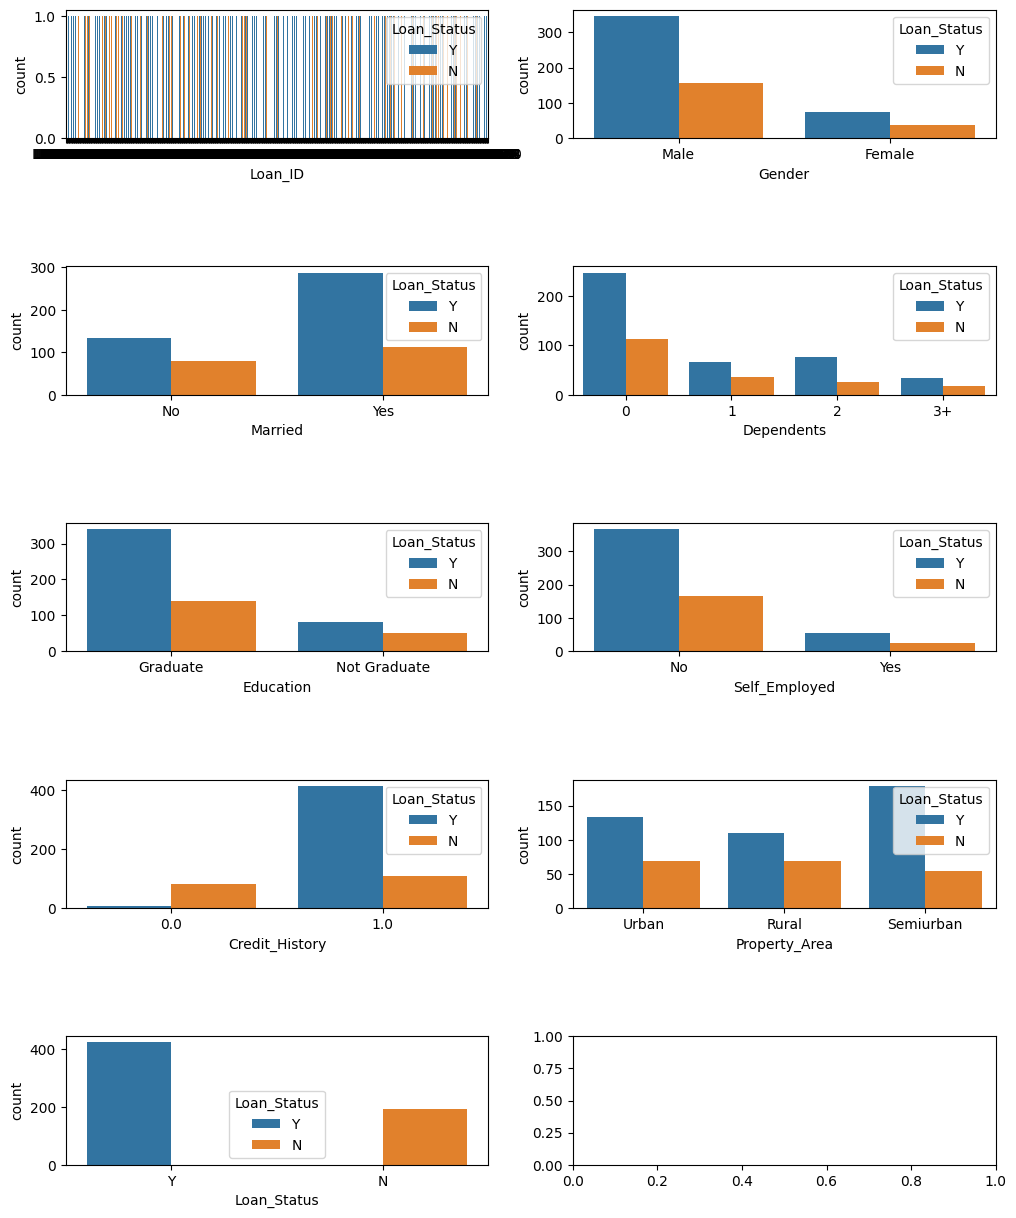

In [ ]:
# Les variables catégoriques :
# Visualisation de l'influence de Loan Status par rapport aux autres variables

fig,axes = plt.subplots(5,2, figsize=(12,15))
for idx,cat_col in enumerate(var_cat):
  row,col = idx //2, idx%2
  sns.countplot(x=cat_col, data=df, hue='Loan_Status', ax=axes[row,col])

plt.subplots_adjust(hspace=1)


<ipython-input-29-e914c7f6759d>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix = df.corr()


<Axes: >

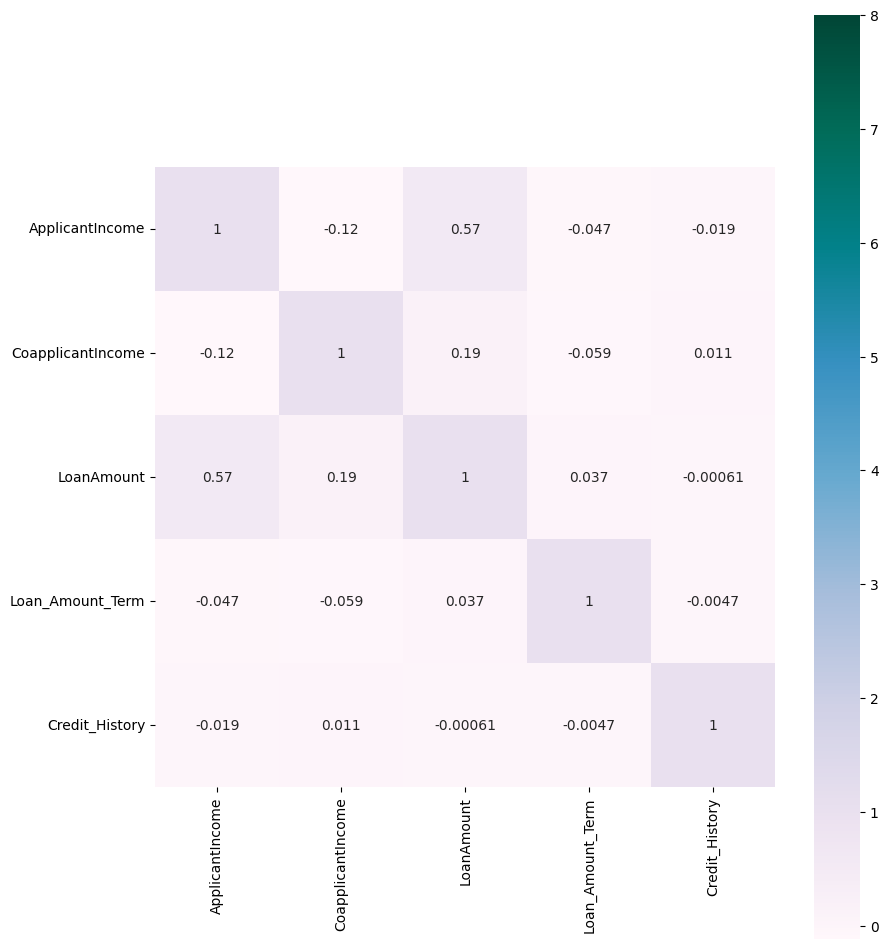

In [ ]:
# Visualation sur la correlation des variables numérique

matrix = df.corr()
f,ax = plt.subplots(figsize=(10,12))
sns.heatmap(matrix, vmax = 8,square=True, cmap='PuBuGn',annot=True)

In [ ]:
df.corr()

<ipython-input-30-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565181,-0.046531,-0.018615
CoapplicantIncome,-0.116605,1.000000,0.189218,-0.059383,0.011134
LoanAmount,0.565181,0.189218,1.000000,0.036960,-0.000607
Loan_Amount_Term,-0.046531,-0.059383,0.036960,1.000000,-0.004705
Credit_History,-0.018615,0.011134,-0.000607,-0.004705,1.000000


**Implémentation du modèl de machine learning**

In [ ]:
# Transofrmation de variables catégoriques en variables numériques

df_cat = df[var_cat]
df_num = df[var_num]
df_cat = pd.get_dummies(df_cat,drop_first=True)
df_cat

,Credit_History,Loan_ID_LP001003,Loan_ID_LP001005,Loan_ID_LP001006,Loan_ID_LP001008,Loan_ID_LP001011,Loan_ID_LP001013,Loan_ID_LP001014,Loan_ID_LP001018,Loan_ID_LP001020,...,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,1.0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
1,1.0,1,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
2,1.0,0,1,0,0,0,0,0,0,0,...,1,1,0,0,0,0,1,0,1,1
3,1.0,0,0,1,0,0,0,0,0,0,...,1,1,0,0,0,1,0,0,1,1
4,1.0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
610,1.0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,1,0,0,0,0,1
611,1.0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,1,1
612,1.0,0,0,0,0,0,0,0,0,0,...,1,1,0,1,0,0,0,0,1,1


In [ ]:
# Concatenation des variables numériques et catégoriques

df_encoded = pd.concat([df_cat,df_num],axis=1)
df_encoded

,Credit_History,Loan_ID_LP001003,Loan_ID_LP001005,Loan_ID_LP001006,Loan_ID_LP001008,Loan_ID_LP001011,Loan_ID_LP001013,Loan_ID_LP001014,Loan_ID_LP001018,Loan_ID_LP001020,...,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,5849,0.0,128.0,360.0
1,1.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4583,1508.0,128.0,360.0
2,1.0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,1,3000,0.0,66.0,360.0
3,1.0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,1,2583,2358.0,120.0,360.0
4,1.0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,1,6000,0.0,141.0,360.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,2900,0.0,71.0,360.0
610,1.0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,4106,0.0,40.0,180.0
611,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,8072,240.0,253.0,360.0
612,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,7583,0.0,187.0,360.0


In [ ]:
# Division des données : Features & Target

X = df_encoded.drop('Loan_Status_Y',axis=1)
y = df_encoded['Loan_Status_Y']

In [ ]:
# Spécification de la partie Test et la partie train 

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=6)

In [ ]:
# Instancier le model

Lg = LogisticRegression()

# Entrainement de données 
Lg.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Prédiction de données 

pred = Lg.predict(X_test)

In [ ]:
# Comparaison de données 
final = pd.DataFrame({'Test Value':y_test , 'Predict Value':pred})
final

,Test Value,Predict Value
387,0,0
266,1,1
292,1,1
392,1,1
332,1,1
...,...,...
309,1,1
511,1,1
98,1,1
238,1,1


In [ ]:
# Evaluation de données 

accuracy_score(y_test,pred)

0.8373983739837398